<a href="https://colab.research.google.com/github/dedimujahid/Data-Thesis-Haris/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study








Langkah-langkah penyelesaian melitputi:
1. Data collection
2. Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
3. Feature Engineering
   1. Feature Extraction - TF Biner
   2. Feature Selection - Chi-Square
4. Modelling (Machine Learning)
   1. Naive Bayes Classifier
5. Model Evaluation
6. Deployment

Pada kasus ini, kita menggunakan data set berbahasa indonesia, sehingga kita membutuhkan *Library Sastrawi* untuk menyelesaikan beberapa permasalahan seperti *stemming*.


##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
!pip -q install sastrawi

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Acquisition

Penjelasan Label Sentimen
* -1: Tweet Negatif
* 1: Tweet Positif

In [ ]:
# Load the dataset
df = pd.read_csv('hasillabeling.csv', encoding='ISO-8859-1')

df.head(10)

,userName,score,content,Compound_Score,label,Sentiment
0,ebiem imam,5,Mungkin untuk map nya bisa ditingkatkan lagi s...,0.8869,Positif,1
1,Mas Iman,1,11 tahun jalan... Tapi aplikasi masih jauh dar...,0.8527,Positif,1
2,Florencia Fanny,5,Tolong notifikasi autobid untuk driver jika ad...,0.8442,Positif,1
3,Agung Gunawansa,5,Navigasinya tolong di perbaiki lagi bapak/ibu ...,0.9458,Positif,1
4,Zhao Zilong,1,Selama sy ngebid indriver yg sy rasakan makin ...,-0.1272,Negatif,-1
5,Ani Aryani,1,Kasih jawaban yang spesifik jangan otomatis te...,-0.5168,Negatif,-1
6,Erico Lumban Raja,1,"Aplikasi buruk, banyak bugnya. 1. Penjemputan ...",-0.7644,Negatif,-1
7,Marthen marthen,3,Untuk di perbaiki oleh team indriver 1. Tampil...,-0.1634,Negatif,-1
8,Anung Suprayetno,5,Punya rating bintang 5 dan prioritas sangat ti...,0.8617,Positif,1
9,Bayu Subuhandi,2,mode auto bid aktif tapi masih manual untuk ma...,0.7968,Positif,1


In [ ]:
df.tail(10)

,userName,score,content,Compound_Score,label,Sentiment
90,Rendy Wagey,5,Orderan Kurir saat mau upload foto gambar masi...,-0.7890,Negatif,-1
91,Baihaqi Kiki,1,sistem nya tidak jelas urutan driver nya tidak...,0.8206,Positif,1
92,Aldy PW,1,Tarif terlalu murah dibawah rata-rata apk lain...,0.0258,Positif,1
93,Andi Suselo,5,Kalau bisa bunyi nada order masuk nyaring agak...,0.4660,Positif,1
94,Rian Purnama,1,Masa akun yang sudah prioritas kalah dengan ak...,-0.9134,Negatif,-1
95,andan fernanda,3,"1.Untuk driver baru masih membingungkan, ketik...",0.5267,Positif,1
96,Agit Gustiawan,5,"Aplikasi bagus, kalo bisa tambahin Peta nya. S...",0.8020,Positif,1
97,Rafdi Akbar,3,Tolong dikembangkan aplikasinya. Orderan palsu...,0.0000,Positif,1
98,Muhamad jihad Ahsan (Jihad),1,"Punya keluhan, tapi tidak ada pilihan. Mau gak...",-0.9312,Negatif,-1
99,andry Wahyu,1,"Saya mau tau, yang komen keluhan driver semua ...",0.0000,Positif,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userName        100 non-null    object 
 1      score        100 non-null    int64  
 2   content         100 non-null    object 
 3   Compound_Score  100 non-null    float64
 4   label           100 non-null    object 
 5   Sentiment       100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [ ]:
from  sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['content'] = labelEncoder.fit_transform(df['content'])
df.head()

,userName,score,content,Compound_Score,label,Sentiment
0,ebiem imam,5,43,0.8869,Positif,1
1,Mas Iman,1,3,0.8527,Positif,1
2,Florencia Fanny,5,85,0.8442,Positif,1
3,Agung Gunawansa,5,44,0.9458,Positif,1
4,Zhao Zilong,1,67,-0.1272,Negatif,-1


In [ ]:
import pandas as pd

# Contoh: DataFrame dengan kolom 'label' berisi 'negatif' dan 'positif'
# df = pd.read_csv('scrapped_data.csv')  # Jika Anda ingin membaca dari CSV

# Membersihkan whitespace pada kolom 'label'
df['label'] = df['label'].str.strip()

# Membuat kolom baru 'sentiment' yang berisi 1 untuk positif dan -1 untuk negatif
# df['sentiment'] = df['label'].apply(lambda x: 1 if x == 'positif' else (-1 if x == 'negatif' else 0))

# Mencetak jumlah total tweet dan distribusi label
print('Total Jumlah Tweet:', df.shape[0], 'data\n')
print('terdiri dari (sentiments):')
print('-- [0] Tweet Negatif\t:', df[df.Sentiment == -1].shape[0], 'data')
print('-- [2] Tweet Positif\t:', df[df.Sentiment == 1].shape[0], 'data\n')


Total Jumlah Tweet: 100 data

terdiri dari (sentiments):
-- [0] Tweet Negatif	: 45 data
-- [2] Tweet Positif	: 55 data



100


<ipython-input-13-d29078d8f33e>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  s = pd.value_counts(df['Sentiment'])


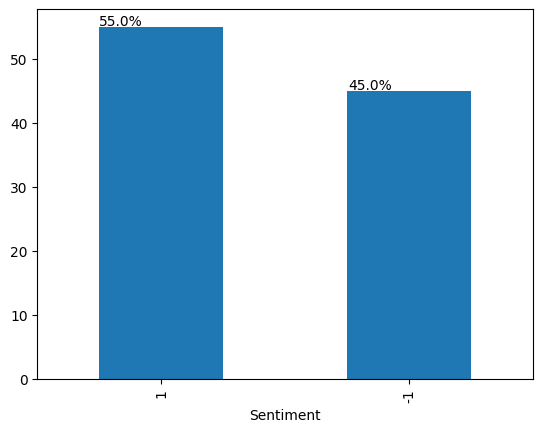

In [ ]:
s = pd.value_counts(df['Sentiment'])
ax = s.plot.bar()
n = len(df.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height () / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

# Text Preprocessing

## Case Folding

In [ ]:
import re

# Fungsi case folding untuk teks
def casefolding(text):
    if isinstance(text, str):  # Pastikan 'text' adalah string
        text = text.lower()  # Mengubah teks menjadi huruf kecil
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Menghilangkan URL
        text = re.sub(r'[-+]?[0-9]+', '', text)  # Menghilangkan angka
        text = re.sub(r'[^\w\s]', '', text)  # Menghilangkan tanda baca
        return text
    else:
        return text  # Jika bukan teks, kembalikan apa adanya

# Ambil sampel dari kolom teks, misalnya 'content' atau 'label'
raw_sample = df['content'].iloc[5]  # Asumsi 'content' adalah kolom yang berisi teks tweet
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)


Raw data	:  33
Case folding	:  33


# **Tokenization**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.utils import tokenize
from spacy.lang.es import Spanish
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')  # Jika belum menginstal punkt tokenizer
nlp = Spanish()

# Load the dataset
df = pd.read_csv('hasillabeling.csv', encoding='ISO-8859-1')

# Memilih nama kolom teks yang ingin Anda tokenisasi
text_column_name = 'content'  # Ganti dengan nama kolom teks yang sesuai dalam DataFrame Anda

# Tokenisasi untuk setiap kalimat dalam kolom teks
def tokenize_sentences(text):
    sentences = sent_tokenize(text)  # Memisahkan kalimat
    tokenized_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)  # Tokenisasi kata dalam kalimat
        filtered_tokens = [token for token in tokens if re.match(r'^[a-zA-Z0-9\']+$', token)]  # Filter token
        tokenized_sentence = ' '.join(filtered_tokens)  # Menggabungkan token kembali menjadi teks
        tokenized_sentences.append(tokenized_sentence)
    return ' '.join(tokenized_sentences)  # Menggabungkan kalimat-kalimat menjadi teks

# Tokenisasi dengan SpaCy
def tokenize_spanish(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return ' '.join(tokens)

# Word Tokenization dengan Gensim
def tokenize_gensim(text):
    return ' '.join(list(tokenize(text)))

# Menggabungkan semua hasil tokenisasi
df['sent_tokenize'] = df[text_column_name].apply(tokenize_sentences)
df['word_tokenize'] = df[text_column_name].apply(word_tokenize)
df['spanish_tokenize'] = df[text_column_name].apply(tokenize_spanish)
df['gensim_tokenize'] = df[text_column_name].apply(tokenize_gensim)

# Menampilkan beberapa baris awal data yang telah di-tokenisasi
print(df.head())

# Count Vectorization dengan Scikit-learn
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df[text_column_name])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['Compound_Score'].values, columns=cv.get_feature_names_out())
print(df_dtm)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


          userName     score  \
0       ebiem imam         5   
1         Mas Iman         1   
2  Florencia Fanny         5   
3  Agung Gunawansa         5   
4      Zhao Zilong         1   

                                             content  Compound_Score    label  \
0  Mungkin untuk map nya bisa ditingkatkan lagi s...          0.8869  Positif   
1  11 tahun jalan... Tapi aplikasi masih jauh dar...          0.8527  Positif   
2  Tolong notifikasi autobid untuk driver jika ad...          0.8442  Positif   
3  Navigasinya tolong di perbaiki lagi bapak/ibu ...          0.9458  Positif   
4  Selama sy ngebid indriver yg sy rasakan makin ...         -0.1272  Negatif   

   Sentiment                                      sent_tokenize  \
0          1  Mungkin untuk map nya bisa ditingkatkan lagi s...   
1          1  11 tahun jalan Tapi aplikasi masih jauh dari h...   
2          1  Tolong notifikasi autobid untuk driver jika ad...   
3          1  Navigasinya tolong di perbaiki lagi IT

## Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/kinanti18/ofa-2022/main/key_norm.csv

--2024-09-14 00:34:54--  https://raw.githubusercontent.com/kinanti18/ofa-2022/main/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.02s   

2024-09-14 00:34:54 (3.49 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/kinanti18/ofa-2022/main/key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['For the application as a passenger, please improve further regarding price determination, as a suggestion, the price should be determined automatically according to the distance because I often get long distance orders for 10 thousand']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword
#stopwords_ind = stopwords_ind

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = df['content'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Kasih jawaban yang spesifik jangan otomatis terus,, perbaiki sistem nya.. Masa yang jarak dekat tidak masuk lelang. Mencari orderan di kota pun jika sistem nya masih seperti ini, pengemudi non prioritas tetap akan susah dapatnya, bodoh !!! Masa sehari cuma dapet 2 pesanan. Indriver memang tidak merata. Tolong berikan jawaban yang tepat..
Case folding		:  kasih jawaban yang spesifik jangan otomatis terus perbaiki sistem nya masa yang jarak dekat tidak masuk lelang mencari orderan di kota pun jika sistem nya masih seperti ini pengemudi non prioritas tetap akan susah dapatnya bodoh  masa sehari cuma dapet  pesanan indriver memang tidak merata tolong berikan jawaban yang tepat
Stopword removal	:  kasih spesifik otomatis perbaiki sistem nya jarak masuk lelang mencari orderan kota sistem nya pengemudi non prioritas susah dapatnya bodoh sehari dapet pesanan indriver merata tolong


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = df['content'].iloc[5]
case_folding = str(casefolding(raw_sample))
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Kasih jawaban yang spesifik jangan otomatis terus,, perbaiki sistem nya.. Masa yang jarak dekat tidak masuk lelang. Mencari orderan di kota pun jika sistem nya masih seperti ini, pengemudi non prioritas tetap akan susah dapatnya, bodoh !!! Masa sehari cuma dapet 2 pesanan. Indriver memang tidak merata. Tolong berikan jawaban yang tepat..
Case folding		:  kasih jawaban yang spesifik jangan otomatis terus perbaiki sistem nya masa yang jarak dekat tidak masuk lelang mencari orderan di kota pun jika sistem nya masih seperti ini pengemudi non prioritas tetap akan susah dapatnya bodoh  masa sehari cuma dapet  pesanan indriver memang tidak merata tolong berikan jawaban yang tepat
Stopword removal	:  kasih spesifik otomatis perbaiki sistem nya jarak masuk lelang mencari orderan kota sistem nya pengemudi non prioritas susah dapatnya bodoh sehari dapet pesanan indriver merata tolong
Stemming		:  kasih spesifik otomatis baik sistem nya jarak masuk lelang cari order kota sistem nya ke

# Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [ ]:
%%time
df['clean_teks'] = df['content'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 1min 8s, sys: 264 ms, total: 1min 8s
Wall time: 1min 22s


In [ ]:
df[['content', 'label','clean_teks']]

,content,label,clean_teks
0,Mungkin untuk map nya bisa ditingkatkan lagi s...,Positif,maaf nya tingkat aplikasi belah kak biar buka ...
1,11 tahun jalan... Tapi aplikasi masih jauh dar...,Positif,jalan aplikasi harap mitra driver aplikasi diu...
2,Tolong notifikasi autobid untuk driver jika ad...,Positif,tolong notifikasi autobid driver order masuk t...
3,Navigasinya tolong di perbaiki lagi bapak/ibu ...,Positif,navigasi tolong baik bapakibu it jalan utama t...
4,Selama sy ngebid indriver yg sy rasakan makin ...,Negatif,ngebid indriver rasa apk order jarak puluh met...
...,...,...,...
95,"1.Untuk driver baru masih membingungkan, ketik...",Positif,driver bingung klik navigasi langsung arah ala...
96,"Aplikasi bagus, kalo bisa tambahin Peta nya. S...",Positif,aplikasi bagus tambahin peta nya antar cs ruma...
97,Tolong dikembangkan aplikasinya. Orderan palsu...,Positif,tolong kembang aplikasi order palsu mod aplika...
98,"Punya keluhan, tapi tidak ada pilihan. Mau gak...",Negatif,keluh pilih lewat sempat kasih rating beda vis...


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
df.to_csv('clean_data.csv')

# Feature Engineering

In [ ]:
# Memisahkan antara kolo fitur dan target
X = df['clean_teks']
y = df['Sentiment']

In [ ]:
X

,clean_teks
0,maaf nya tingkat aplikasi belah kak biar buka ...
1,jalan aplikasi harap mitra driver aplikasi diu...
2,tolong notifikasi autobid driver order masuk t...
3,navigasi tolong baik bapakibu it jalan utama t...
4,ngebid indriver rasa apk order jarak puluh met...
...,...
95,driver bingung klik navigasi langsung arah ala...
96,aplikasi bagus tambahin peta nya antar cs ruma...
97,tolong kembang aplikasi order palsu mod aplika...
98,keluh pilih lewat sempat kasih rating beda vis...


In [ ]:
y

,Sentiment
0,1
1,1
2,1
3,1
4,-1
...,...
95,1
96,1
97,1
98,-1


# Feature Extraction (TF-IDF)

In [ ]:
#Menyimpan model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf = vec_TF_IDF.transform(X)

#Menyimpan vectorizer.vocabulary_
pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.pkl","wb"))

In [ ]:
#Hasil dari vocabulary dari TF-IDF
vec_TF_IDF.vocabulary_

{'maaf': 392,
 'nya': 497,
 'tingkat': 745,
 'aplikasi': 44,
 'belah': 89,
 'kak': 295,
 'biar': 103,
 'buka': 119,
 'google': 226,
 'bagus': 62,
 'tolong': 751,
 'hapus': 238,
 'edit': 193,
 'ongkos': 512,
 'cs': 150,
 'rugi': 617,
 'jarak': 275,
 'kilometer': 327,
 'jalan': 270,
 'harap': 240,
 'mitra': 435,
 'driver': 186,
 'diupdate': 178,
 'tampil': 710,
 'mnguntungkan': 436,
 'tim': 738,
 'it': 267,
 'indriver': 261,
 'lulus': 389,
 'atas': 50,
 'modbot': 441,
 'baca': 59,
 'tempuh': 723,
 'real': 597,
 'tarik': 713,
 'garis': 223,
 'lurus': 391,
 'status': 692,
 'prioritas': 567,
 'sulit': 698,
 'order': 517,
 'dekat': 165,
 'masuk': 411,
 'pemberitahuan': 536,
 'maps': 407,
 'kadang': 294,
 'ngaco': 475,
 'sesuai': 669,
 'notifikasi': 493,
 'autobid': 55,
 'terima': 730,
 'calon': 130,
 'tumpang': 758,
 'variatif': 781,
 'suara': 695,
 'ceklek': 135,
 'dengar': 168,
 'pas': 533,
 'ramai': 583,
 'layar': 373,
 'aktif': 15,
 'nyala': 499,
 'terkadang': 732,
 'screen': 635,
 'on':

In [ ]:
# Melihat Jumlah Fitur yang ada
print(len(vec_TF_IDF.vocabulary_))


788


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus kita
feature_names = vec_TF_IDF.get_feature_names_out()
print(feature_names)


['ac' 'ada' 'adaalangkah' 'adain' 'adil' 'admin' 'adu' 'afil' 'aga' 'ah'
 'ajabenerin' 'ajja' 'ajuin' 'akal' 'akibat' 'aktif' 'akun' 'akurasi'
 'akurat' 'al' 'alam' 'alamat' 'alami' 'alangkah' 'alas' 'alhasil' 'alih'
 'alternatif' 'ambil' 'ampun' 'an' 'anak' 'ancurmasuk' 'andal' 'aneh'
 'anehterimakasih' 'angka' 'anjinggg' 'antar' 'antert' 'antri' 'apa'
 'apikasi' 'apk' 'aplikasi' 'aplikator' 'app' 'arah' 'argo' 'asli' 'atas'
 'ataw' 'atribut' 'atur' 'auto' 'autobid' 'autobidnya' 'autobit' 'awal'
 'baca' 'bagi' 'bagong' 'bagus' 'bahan' 'bahaya' 'baik' 'balas' 'balik'
 'balikin' 'ban' 'banget' 'bantu' 'bantuancus' 'banyak' 'banyakkadana'
 'bapakibu' 'baru' 'barukami' 'batal' 'batalin' 'batas' 'battery' 'bawa'
 'bawah' 'bayar' 'bb' 'bbmdan' 'beda' 'bedah' 'belah' 'belanja' 'benah'
 'bener' 'benerkrna' 'bengsin' 'beranda' 'berantas' 'berat'
 'berfungsimohon' 'beritahukan' 'bersih' 'besar' 'bhkn' 'biar' 'biaya'
 'bid' 'bidding' 'biji' 'bikin' 'bilang' 'bingung' 'bintang' 'blank'
 'blokir' 

In [ ]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,ac,ada,adaalangkah,adain,adil,admin,adu,afil,aga,ah,...,urut,usah,utama,variatif,verifikasi,veteran,visual,voice,wilayah,ya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.198661,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19606,0.0,...,0.0,0.0,0.304596,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.158293,0.0,0.0,0.0


# Feature Selection

In [ ]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjadi array agar dapat dijalankan pada proses seleksi fitur
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Gunakan k='all' untuk mempertahankan semua fitur
chi2_features = SelectKBest(chi2, k='all')
X_kbest_features = chi2_features.fit_transform(x_train, y_train)

# Features tidak dikurangi
print('Original feature number:', x_train.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])


Original feature number: 788
Reduced feature number: 788


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.116321
1,0.170575
2,0.176492
3,0.176492
4,0.271226
...,...
783,0.254742
784,0.193469
785,0.243085
786,0.241806


In [ ]:
#Menampilkan fitur yang ada dengan nilainya
feature =vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.116321,ac
1,0.170575,ada
2,0.176492,adaalangkah
3,0.176492,adain
4,0.271226,adil
...,...,...
783,0.254742,veteran
784,0.193469,visual
785,0.243085,voice
786,0.241806,wilayah


In [ ]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
126,1.728765,buruk
764,1.437944,ubah
34,1.413546,aneh
158,1.372188,dapat
261,1.298239,indriver
...,...,...
546,0.000060,perhati
139,0.000053,chat
304,0.000027,kaya
376,0.000009,lelang


In [ ]:
#Menampilkan mask pada feature yang diseleksi
mask =chi2_features.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
#Memasukkan data yang bernilai true (fitur yang terpilih)
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['ac',
 'ada',
 'adaalangkah',
 'adain',
 'adil',
 'admin',
 'adu',
 'afil',
 'aga',
 'ah',
 'ajabenerin',
 'ajja',
 'ajuin',
 'akal',
 'akibat',
 'aktif',
 'akun',
 'akurasi',
 'akurat',
 'al',
 'alam',
 'alamat',
 'alami',
 'alangkah',
 'alas',
 'alhasil',
 'alih',
 'alternatif',
 'ambil',
 'ampun',
 'an',
 'anak',
 'ancurmasuk',
 'andal',
 'aneh',
 'anehterimakasih',
 'angka',
 'anjinggg',
 'antar',
 'antert',
 'antri',
 'apa',
 'apikasi',
 'apk',
 'aplikasi',
 'aplikator',
 'app',
 'arah',
 'argo',
 'asli',
 'atas',
 'ataw',
 'atribut',
 'atur',
 'auto',
 'autobid',
 'autobidnya',
 'autobit',
 'awal',
 'baca',
 'bagi',
 'bagong',
 'bagus',
 'bahan',
 'bahaya',
 'baik',
 'balas',
 'balik',
 'balikin',
 'ban',
 'banget',
 'bantu',
 'bantuancus',
 'banyak',
 'banyakkadana',
 'bapakibu',
 'baru',
 'barukami',
 'batal',
 'batalin',
 'batas',
 'battery',
 'bawa',
 'bawah',
 'bayar',
 'bb',
 'bbmdan',
 'beda',
 'bedah',
 'belah',
 'belanja',
 'benah',
 'bener',
 'benerkrna',
 'bengsin',
 

In [ ]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features

{'maaf': 392,
 'nya': 497,
 'tingkat': 745,
 'aplikasi': 44,
 'belah': 89,
 'kak': 295,
 'biar': 103,
 'buka': 119,
 'google': 226,
 'bagus': 62,
 'tolong': 751,
 'hapus': 238,
 'edit': 193,
 'ongkos': 512,
 'cs': 150,
 'rugi': 617,
 'jarak': 275,
 'kilometer': 327,
 'jalan': 270,
 'harap': 240,
 'mitra': 435,
 'driver': 186,
 'diupdate': 178,
 'tampil': 710,
 'mnguntungkan': 436,
 'tim': 738,
 'it': 267,
 'indriver': 261,
 'lulus': 389,
 'atas': 50,
 'modbot': 441,
 'baca': 59,
 'tempuh': 723,
 'real': 597,
 'tarik': 713,
 'garis': 223,
 'lurus': 391,
 'status': 692,
 'prioritas': 567,
 'sulit': 698,
 'order': 517,
 'dekat': 165,
 'masuk': 411,
 'pemberitahuan': 536,
 'maps': 407,
 'kadang': 294,
 'ngaco': 475,
 'sesuai': 669,
 'notifikasi': 493,
 'autobid': 55,
 'terima': 730,
 'calon': 130,
 'tumpang': 758,
 'variatif': 781,
 'suara': 695,
 'ceklek': 135,
 'dengar': 168,
 'pas': 533,
 'ramai': 583,
 'layar': 373,
 'aktif': 15,
 'nyala': 499,
 'terkadang': 732,
 'screen': 635,
 'on':

In [ ]:
#Melihat jumlah fitur baru berdasarkan nilai k pada chi-square
len(new_selected_features)

788

In [ ]:
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(new_selected_features,open("selected_feature_tf-idf.pkl","wb"))

In [ ]:
#Menampilkan Fitur-fitur yang sudah diseleksi
#menampilkan fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,ac,ada,adaalangkah,adain,adil,admin,adu,afil,aga,ah,...,urut,usah,utama,variatif,verifikasi,veteran,visual,voice,wilayah,ya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.198661,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19606,0.0,...,0.0,0.0,0.304596,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.158293,0.0,0.0,0.0


# Modelling (Machine Learning)

## Naive Bayes Classifier

In [ ]:
#Import Library
import random
from sklearn.model_selection import train_test_split

#Algoritme
#Algoritme yang dikomparasi
from sklearn import svm
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [ ]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x = selected_x
y = df.label
#Memisihkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 80
Banyak data x_test  : 20
Banyak data y_train : 80
Banyak data y_test  : 20


In [ ]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = MultinomialNB()
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

#y_train

Duration: 0:00:00.009841


In [ ]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array(['Positif', 'Positif', 'Positif', 'Positif', 'Negatif', 'Positif',
       'Positif', 'Positif', 'Negatif', 'Negatif', 'Positif', 'Negatif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif'], dtype='<U7')

In [ ]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  12  data
prediksi salah:  8  data
Akurasi Algoritme:  60.0 %
TRUE NEGATIVE (TN): 2
FALSE NEGATIVE (FN): 3
TRUE POSITIVE (TP): 10
FALSE POSITIVE (FP): 5
PRECISION: 66.66666666666666 %
RECALL: 76.92307692307693 %
              precision    recall  f1-score   support

     Negatif       0.40      0.29      0.33         7
     Positif       0.67      0.77      0.71        13

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.57      0.60      0.58        20



In [ ]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.65 0.55 0.75 0.55 0.9  0.75 0.5  0.65 0.6  0.75]
accuracy:  0.6649999999999999


In [ ]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_naive.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing_process(data_input)

#Load
tfidf = TfidfVectorizer


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==2):
    s ="Sentimen Positif"
elif (hasil==1):
    s ="Sentimen Netral"
else:
    s ="Sentimen Negatif"

print("Hasil prediksi:\n", s)

Masukkan sentiment:
tidak
Hasil prediksi:
 Sentimen Negatif


# WordCloud

In [ ]:
# dowloand Wordcloud packages
!pip install wordcloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

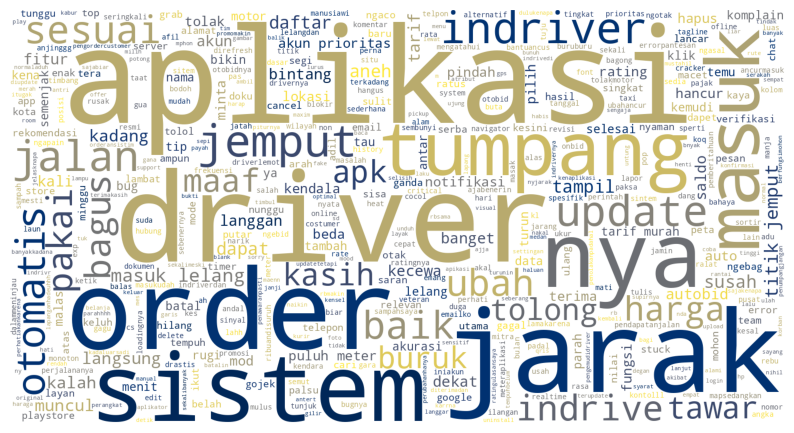

In [ ]:
# WordCloud Sentimen Negatif

sentimen_negatif = df[df.Sentiment == -1]
negatif_string = []

for t in sentimen_negatif.clean_teks:
  negatif_string.append(t)

negatif_string = pd.Series(negatif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",colormap="cividis", max_words=500,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=1500, height=800).generate(negatif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

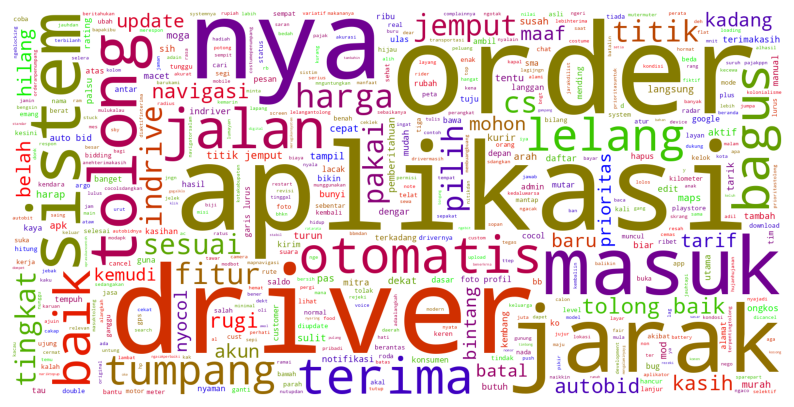

In [ ]:
# WordCloud Sentimen Positif

sentimen_positif = df[df.Sentiment == 1]
netral_string = []

for t in sentimen_positif.clean_teks:
  netral_string.append(t)

netral_string = pd.Series(netral_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color="white",colormap='brg', max_words=500,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42).generate(netral_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()